In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train = pd.read_csv('train_modified.csv')
test = pd.read_csv('test_modified.csv')

In [3]:
ID = 'id'
target = 'cuisine'
predictors = [col for col in train.columns if col not in [target,ID]]

In [4]:
train['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
train['cuisine']=number.fit_transform(train['cuisine'])

# Naive Bayes model

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
model_NB = GaussianNB()
model_NB.fit(train[predictors], train[target])

GaussianNB(priors=None)

In [8]:
model_NB.score(train[predictors], train[target])

0.246316689294514

In [9]:
predictions = model_NB.predict(test[predictors])

In [10]:
predictions = number.inverse_transform(predictions)

/home/ibtissem/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
cuisineId =np.array(test["id"])
solution_NB = pd.DataFrame(predictions, cuisineId, columns = ["cuisine"])

In [12]:
solution_NB.head()

,cuisine
18009,jamaican
28583,irish
41580,moroccan
29752,cajun_creole
35687,british


In [13]:
solution_NB.to_csv("my_submission_nb.csv", index_label = ["id"])

### Score Naive Bayes = 0.21842

# Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
model_LR=LogisticRegression()
model_LR.fit(train[predictors], train[target])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
model_LR.score(train[predictors], train[target])

0.8012520742193393

In [10]:
print(classification_report(train[target], model_LR.predict(train[predictors])))

             precision    recall  f1-score   support

          0       0.78      0.48      0.59       467
          1       0.69      0.41      0.51       804
          2       0.80      0.72      0.76      1546
          3       0.80      0.89      0.84      2673
          4       0.79      0.61      0.69       755
          5       0.62      0.65      0.64      2646
          6       0.84      0.70      0.77      1175
          7       0.87      0.92      0.89      3003
          8       0.77      0.48      0.59       667
          9       0.80      0.91      0.85      7838
         10       0.91      0.71      0.79       526
         11       0.88      0.69      0.78      1423
         12       0.87      0.76      0.81       830
         13       0.90      0.93      0.92      6438
         14       0.88      0.77      0.82       821
         15       0.77      0.42      0.55       489
         16       0.71      0.83      0.76      4320
         17       0.74      0.48      0.58   

In [11]:
print(confusion_matrix(train[target], model_LR.predict(train[predictors])))

[[ 223    3    8    2   10   14    0   16    1   41    0    0    0   70
     0    1   51   12   15    0]
 [   1  328    6    0    3  148    3   21   33   66    1    1    1    9
     1    8  169    4    1    0]
 [   1    4 1109    5    1   60    0    3    1   89    1    2    1   40
     0    4  219    5    0    1]
 [   3    4    4 2368   17   18    1   12    0   35    3   44   40   20
     2    3   35    0   43   21]
 [  14    2    4   89  460   15    0    7    2   27    0    8    3   28
     0    1   57    7   17   14]
 [   2   25   18    7    2 1732   12   10   16  558    2    4    0   23
     8   11  186   28    2    0]
 [   0    1    0    1    0   31  827   22    0  219    0    1    1   12
    16    3   26   15    0    0]
 [   4    2    2    9    5   15   16 2773    1   29    5    1    2   50
    31    0   33    3   21    1]
 [   0   31    3    2    2   85    7    7  323   41    3    0    0    9
     1    3  144    6    0    0]
 [   2    9   16    5    2  270   57   17   10 7164    

In [17]:
predictions_LR=model_LR.predict(test[predictors])

In [18]:
predictions_LR=number.inverse_transform(predictions_LR)

/home/ibtissem/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
solution_LR = pd.DataFrame(predictions_LR, cuisineId, columns = ["cuisine"])

In [20]:
solution_LR.head()

,cuisine
18009,british
28583,southern_us
41580,italian
29752,cajun_creole
35687,italian


In [21]:
solution_LR.to_csv("my_submission_lr.csv", index_label = ["id"])

### Score Logistic Regression = 0.77584

# Random Forest

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
model_RF= RandomForestClassifier(n_estimators = 500, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 30)

In [14]:
model_RF.fit(train[predictors], train[target])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=50, verbose=0, warm_start=False)

In [15]:
model_RF.score(train[predictors], train[target])

0.6514808668979736

In [16]:
predictions_RF=model_RF.predict(test[predictors])

In [21]:
predictions_RF=number.inverse_transform(predictions_RF)

/home/ibtissem/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
cuisineId =np.array(test["id"])
solution_RF = pd.DataFrame(predictions_RF, cuisineId, columns = ["cuisine"])

In [23]:
solution_RF.head()

,cuisine
18009,southern_us
28583,southern_us
41580,italian
29752,cajun_creole
35687,italian


In [24]:
solution_RF.to_csv("my_submission_rf.csv", index_label = ["id"])

### Score Random Forest = 0.63213

# Random forest with tuning

In [11]:
param_grid={'min_samples_leaf':[1,5,10,50,100,200,500]}
grid=GridSearchCV(RandomForestClassifier(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto"), param_grid, verbose=3)

In [12]:
grid.fit(train[predictors], train[target])

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] min_samples_leaf=1 ..............................................
[CV] ......... min_samples_leaf=1, score=0.745306491744, total= 2.1min
[CV] min_samples_leaf=1 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV] ......... min_samples_leaf=1, score=0.745154234859, total= 1.4min
[CV] min_samples_leaf=1 ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.7min remaining:    0.0s


[CV] ......... min_samples_leaf=1, score=0.741246604286, total= 1.3min
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=5, score=0.700821835181, total= 1.0min
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=5, score=0.697413077909, total= 1.0min
[CV] min_samples_leaf=5 ..............................................
[CV] ......... min_samples_leaf=5, score=0.698837911259, total= 1.1min
[CV] min_samples_leaf=10 .............................................
[CV] ........ min_samples_leaf=10, score=0.672396893614, total= 1.0min
[CV] min_samples_leaf=10 .............................................
[CV] ........ min_samples_leaf=10, score=0.668527038238, total=  57.4s
[CV] min_samples_leaf=10 .............................................
[CV] ........ min_samples_leaf=10, score=0.673936009659, total=  58.2s
[CV] min_samples_leaf=50 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed: 21.7min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=50, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': [1, 5, 10, 50, 100, 200, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [13]:
grid.best_score_, grid.best_params_

(0.7439030522451853, {'min_samples_leaf': 1})

In [14]:
grid_predictions_RF=grid.predict(test[predictors])

In [16]:
grid_predictions_RF=number.inverse_transform(grid_predictions_RF)

/home/ibtissem/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
cuisineId =np.array(test["id"])
grid_solution_RF = pd.DataFrame(grid_predictions_RF, cuisineId, columns = ["cuisine"])

In [18]:
grid_solution_RF.head()

,cuisine
18009,italian
28583,southern_us
41580,italian
29752,cajun_creole
35687,italian


In [19]:
grid_solution_RF.to_csv("my_submission_gridRf.csv", index_label = ["id"])

In [20]:
grid_predictions_RF.shape

(9944,)

In [22]:
model_RF= RandomForestClassifier(n_estimators = 200, oob_score = True, n_jobs = -1,random_state =50,max_features = "auto", min_samples_leaf = 1)

In [23]:
model_RF.fit(train[predictors], train[target])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=True, random_state=50, verbose=0, warm_start=False)

Text(0,0.5,'Feature Importance Score')

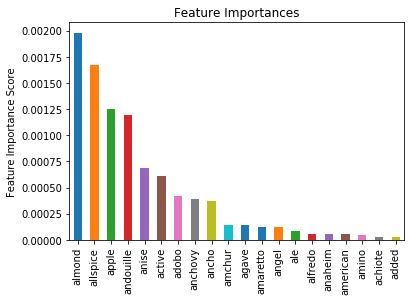

In [26]:
feat_imp = pd.Series(model_RF.feature_importances_[:20], index=predictors[:20]).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [27]:
model_RF.score(train[predictors], train[target])

0.999572585105848

### Score=0.75291

# SVM model

In [6]:
classifier = SVC(C=100, # penalty parameter, setting it to a larger value 
	 			 kernel='rbf', # kernel type, rbf working fine here
	 			 degree=3, # default value, not tuned yet
	 			 gamma=1, # kernel coefficient, not tuned yet
	 			 coef0=1, # change to 1 from default value of 0.0
	 			 shrinking=True, # using shrinking heuristics
	 			 tol=0.001, # stopping criterion tolerance 
	      		 probability=False, # no need to enable probability estimates
	      		 class_weight=None, # all classes are treated equally 
	      		 verbose=False, # print the logs 
          		 decision_function_shape=None, # will use one vs rest explicitly 
          		 random_state=None)
model_svm = OneVsRestClassifier(classifier, n_jobs=-1)
#	      		 max_iter=-1, # no limit, let it run
#	      		 cache_size=200, # 200 MB cache size

In [ ]:
model_svm.fit(train[predictors], train[target])

In [8]:
model_svm.score(train[predictors], train[target])

0.246316689294514

In [16]:
predictions_svm=model_svm.predict(test[predictors])

In [18]:
predictions_svm=number.inverse_transform(predictions_svm)

/home/ibtissem/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
solution_svm = pd.DataFrame(predictions_svm, cuisineId, columns = ["cuisine"])

In [21]:
solution_svm.to_csv("my_submission_svm.csv", index_label = ["id"])

# KNN model

In [1]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(neighbors=9)

TypeError: _init_params() got an unexpected keyword argument 'neighbors'